In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Cargar el archivo CSV
path ="C:\\Users\\saral\\OneDrive - Universidad de los andes\\ARCHVIOS MAC SARA\\SARA GG 8\\OCTAVO SEMESTRE\\ANALITICA\\PROYECTO 1\\SeoulBikeData_utf8.csv"
df = pd.read_csv(path)

In [3]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [4]:
# 1. Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [5]:
# 2. Aplicar Label Encoding para 'Holiday' y 'Functioning Day' 
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})


In [6]:
# 3. Aplicar One-Hot Encoding a la columna 'Seasons'
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)


In [7]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,False,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,False,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,False,False,False
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,False,False,False
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,False,False,False
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,False,False,False


#estadisticas descriptivas

In [8]:
estadisticas = df.describe()
print(estadisticas)

                                Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         704.602055    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         644.997468     6.922582   

       Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count     8760.000000  8760.000000       8760.000000       8760.000000   
mean        12.882922    58.226256          1.724909       1436.825799   
min        -17.800000     0.000000          0.000000         27.000000   
25%          3.500000    42.000000          0.900000   

#GRAFICOS DE LAS VARIABLES

In [9]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

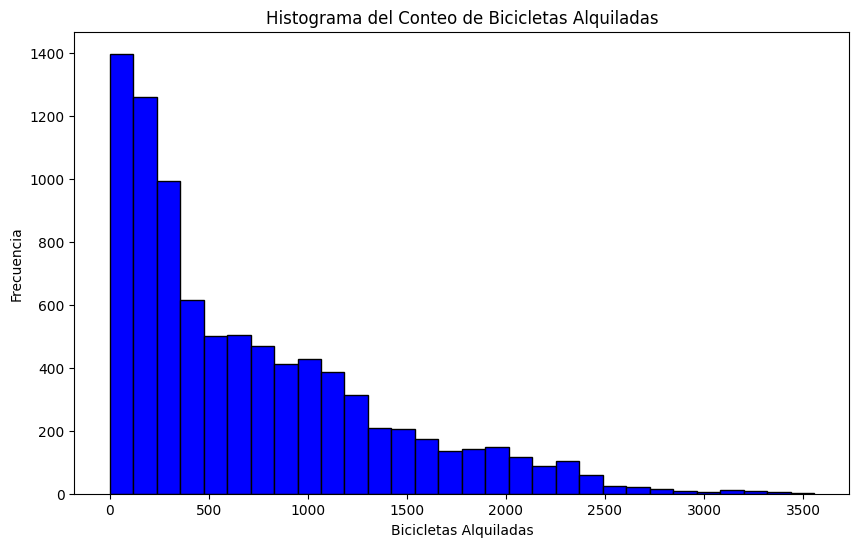

In [11]:
# Histograma del conteo de bicicletas alquiladas
plt.figure(figsize=(10, 6))
plt.hist(df['Rented Bike Count'], bins=30, color='blue', edgecolor='black')
plt.title('Histograma del Conteo de Bicicletas Alquiladas')
plt.xlabel('Bicicletas Alquiladas')
plt.ylabel('Frecuencia')
plt.show()

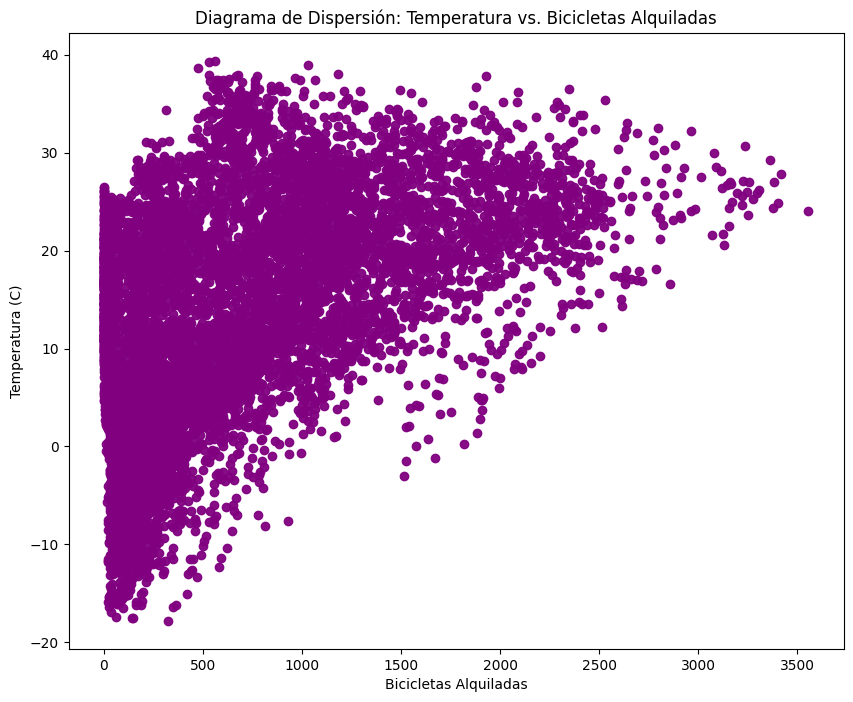

In [12]:
# Diagrama de dispersión entre temperatura y bicicletas alquiladas
plt.figure(figsize=(10, 8))
plt.scatter( df['Rented Bike Count'],df['Temperature(C)'], alpha=0.95, color='purple')
plt.title('Diagrama de Dispersión: Temperatura vs. Bicicletas Alquiladas')
plt.ylabel('Temperatura (C)')
plt.xlabel('Bicicletas Alquiladas')
plt.show()

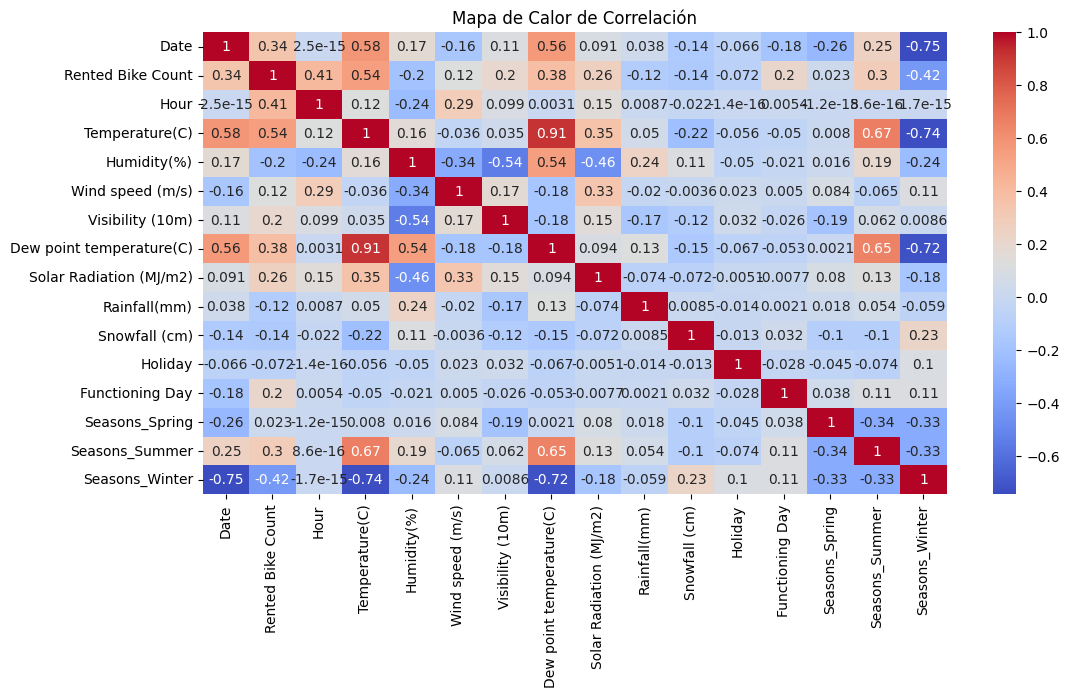

In [13]:
# Mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

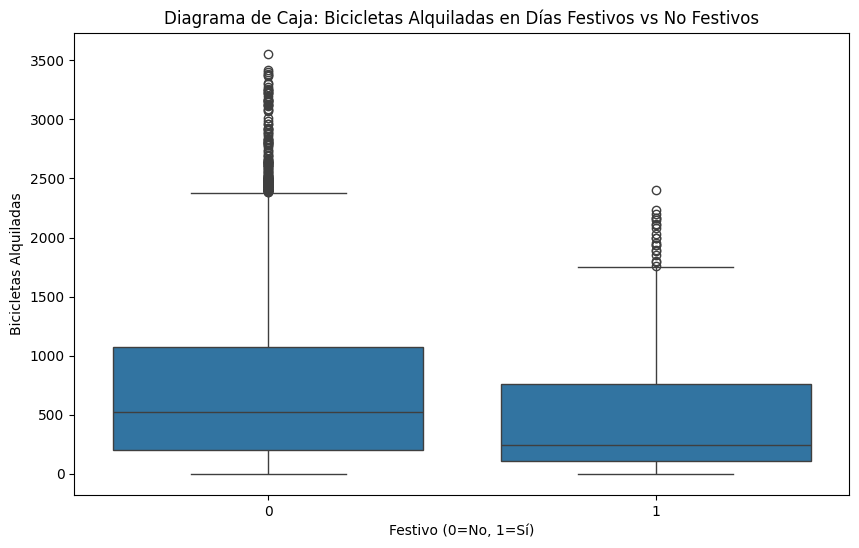

In [14]:
# Boxplot para comparar el conteo de bicicletas en días festivos vs no festivos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Holiday'], y=df['Rented Bike Count'])
plt.title('Diagrama de Caja: Bicicletas Alquiladas en Días Festivos vs No Festivos')
plt.xlabel('Festivo (0=No, 1=Sí)')
plt.ylabel('Bicicletas Alquiladas')
plt.show()

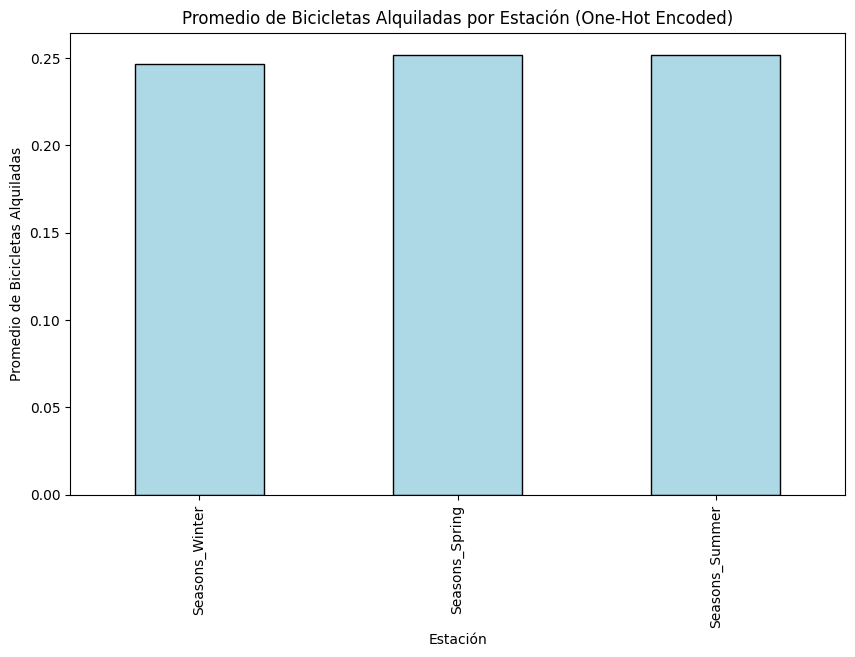

In [15]:
# Gráfico de barras para comparar el conteo de bicicletas según cada estación (one-hot encoded)
plt.figure(figsize=(10, 6))
df[['Seasons_Winter', 'Seasons_Spring', 'Seasons_Summer']].mean().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Promedio de Bicicletas Alquiladas por Estación (One-Hot Encoded)')
plt.xlabel('Estación')
plt.ylabel('Promedio de Bicicletas Alquiladas')
plt.show()


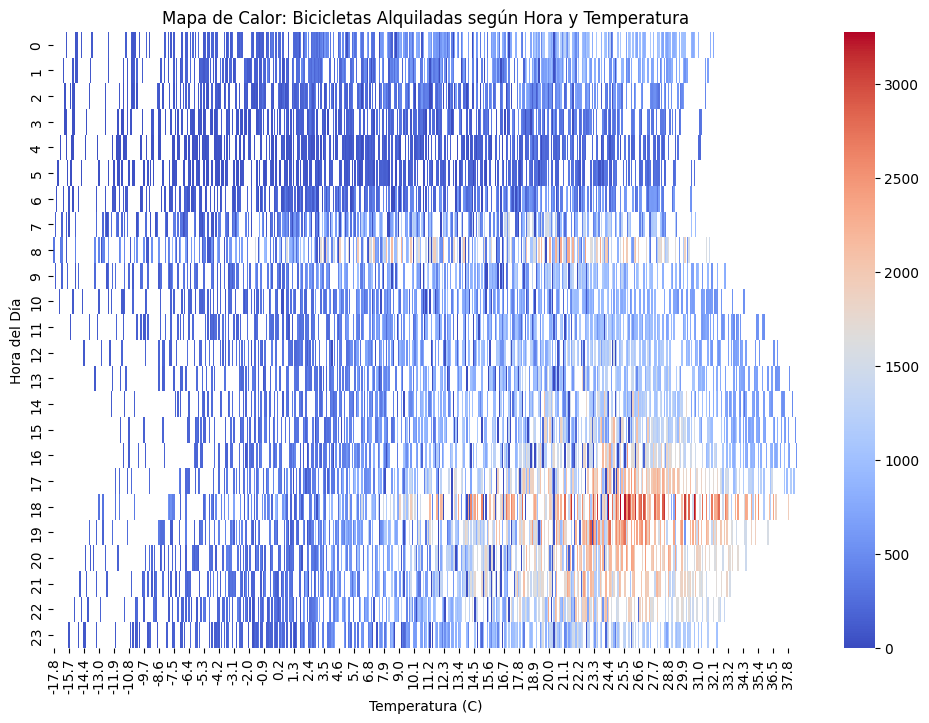

In [16]:
# Gráfico de calor para ver la intensidad de bicicletas alquiladas a distintas horas según la temperatura
plt.figure(figsize=(12, 8))
pivot_table = df.pivot_table(values='Rented Bike Count', index='Hour', columns='Temperature(C)', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Mapa de Calor: Bicicletas Alquiladas según Hora y Temperatura')
plt.xlabel('Temperatura (C)')
plt.ylabel('Hora del Día')
plt.show()



<Figure size 1000x600 with 0 Axes>

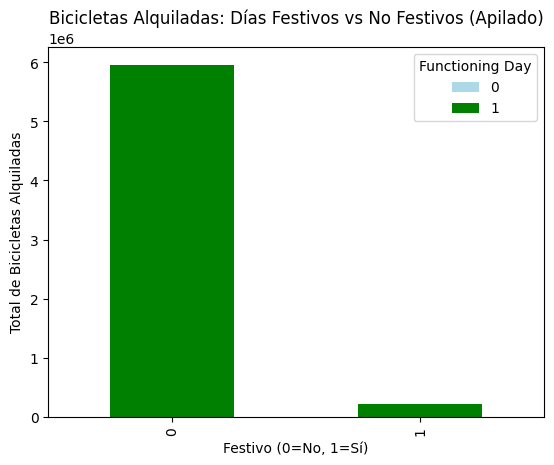

In [17]:
# Gráfico de barras apiladas para ver el conteo de bicicletas en días festivos vs no festivos
plt.figure(figsize=(10, 6))
df.groupby(['Holiday', 'Functioning Day'])['Rented Bike Count'].sum().unstack().plot(kind='bar', stacked=True, color=['lightblue', 'green'])
plt.title('Bicicletas Alquiladas: Días Festivos vs No Festivos (Apilado)')
plt.xlabel('Festivo (0=No, 1=Sí)')
plt.ylabel('Total de Bicicletas Alquiladas')
plt.show()


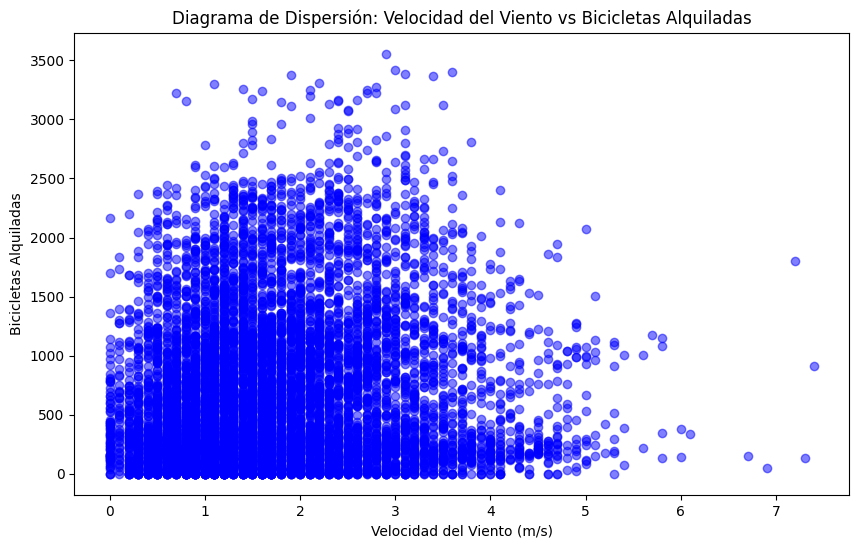

In [18]:
# Diagrama de dispersión entre velocidad del viento y bicicletas alquiladas
plt.figure(figsize=(10, 6))
plt.scatter(df['Wind speed (m/s)'], df['Rented Bike Count'], color='blue', alpha=0.5)
plt.title('Diagrama de Dispersión: Velocidad del Viento vs Bicicletas Alquiladas')
plt.xlabel('Velocidad del Viento (m/s)')
plt.ylabel('Bicicletas Alquiladas')
plt.show()

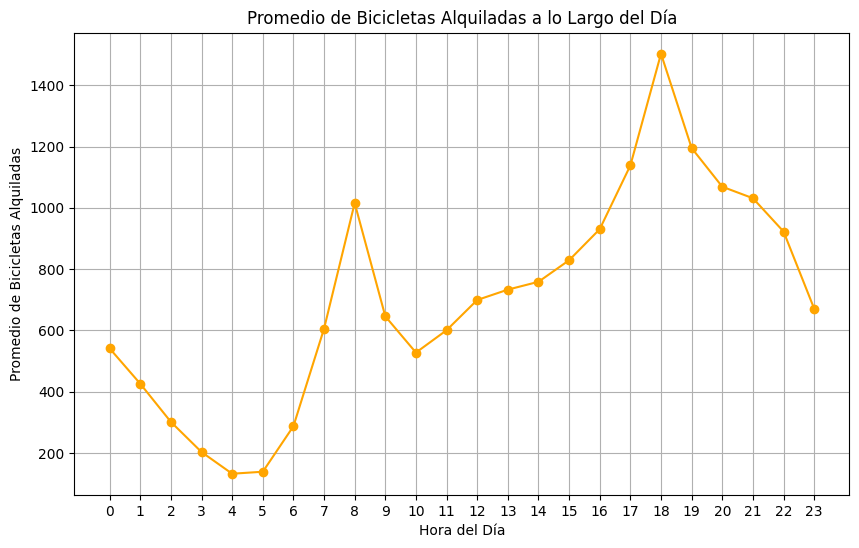

In [19]:

# Gráfico de líneas para ver cómo cambia el conteo de bicicletas durante las horas del día
plt.figure(figsize=(10, 6))
df.groupby('Hour')['Rented Bike Count'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Promedio de Bicicletas Alquiladas a lo Largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Bicicletas Alquiladas')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()
